In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from tqdm import tqdm

In [2]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [3]:
training = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/application_train.csv')
testing = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/application_test.csv')
bureau = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/bureau.csv')                      # previous credits in Credit Bureau
bureau_balance = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/bureau_balance.csv')      # monthly balance
                                                                                                                                                    # 'STATUS' meaning?
POS_CASH = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/POS_CASH_balance.csv')          # previous POS (point of sales) and cash loans 
credit_card = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/credit_card_balance.csv')    # previous credit cards
prev_apl = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/previous_application.csv')      # previous applications
payment = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Home Credit default risk/installments_payments.csv')      # Repayment history for the previously disbursed credits


In [4]:
print(bureau.columns, "\n")
print(len(bureau['SK_ID_CURR'].unique()))
pd.DataFrame(bureau['SK_ID_CURR'].value_counts()).transpose()

# SK_BUREAU_ID: unique in this "bureau" df
# DAYS_CREDIT: How many days before current application did client apply for Credit Bureau credit
# CREDIT_DAY_OVERDUE: Number of days past due on CB credit at the time of application for related loan in our sample
# DAYS_CREDIT_ENDDATE: Remaining duration of CB credit (in days) at the time of application in Home Credit
# DAYS_CREDIT_UPDATE: How many days before loan application did last information about the Credit Bureau credit come

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object') 

218292


SK_ID_CURR,120860,169704,318065,251643,425396,295809,177014,280155,252366,218175,...,304748,430469,160781,334642,127041,234522,180076,171655,258946,399573
count,116,81,78,61,60,59,56,55,55,55,...,1,1,1,1,1,1,1,1,1,1


In [5]:
print(bureau_balance.columns, "\n")
pd.DataFrame(bureau_balance['SK_ID_BUREAU'].value_counts()).transpose()     # Number of Months in balance = count - 1

# MONTHS_BALANCE: Month of balance relative to application date (-1 means the freshest balance date)
# STATUS: Status of Credit Bureau loan during the month (C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] )

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object') 



SK_ID_BUREAU,5907926,6786422,6028907,5229867,6363619,5002065,5817528,5817489,5817435,5002064,...,5253267,5708683,5709203,5708684,5242749,5052730,5207756,6543954,6364503,5005798
count,97,97,97,97,97,97,97,97,97,97,...,1,1,1,1,1,1,1,1,1,1


In [6]:
print(POS_CASH.columns, "\n")
print(len(POS_CASH['SK_ID_CURR'].unique()))
POS_CASH.sort_values(by='MONTHS_BALANCE')

# SK_ID_PREV: ID of previous credit in Home Credit
# CNT_INSTALMENT: Term of previous credit (can change over time)
# SK_DPD: DPD (days past due) during the month of previous credit

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object') 

337252


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
767082,1775141,244572,-96,4.0,2.0,Active,0,0
3573052,1595167,454443,-96,10.0,3.0,Active,17,0
5231758,2588917,294677,-96,4.0,2.0,Active,0,0
2251801,1810403,145248,-96,10.0,0.0,Active,0,0
727339,1925384,330163,-96,12.0,6.0,Active,0,0
...,...,...,...,...,...,...,...,...
3887454,2385634,121591,-1,48.0,27.0,Active,0,0
2388448,1335383,186424,-1,48.0,38.0,Active,0,0
7348487,2318117,271325,-1,10.0,8.0,Active,0,0
871138,1900506,208057,-1,12.0,10.0,Active,0,0


In [7]:
sample = POS_CASH.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['MONTHS_BALANCE'].min()

df_sample = pd.DataFrame(sample)
df_sample = df_sample.reset_index()
df_sample

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE
0,100001,1369693,-57
1,100001,1851984,-96
2,100002,1038818,-19
3,100003,1810518,-25
4,100003,2396755,-77
...,...,...,...
936320,456255,1359084,-15
936321,456255,1743609,-33
936322,456255,2073384,-21
936323,456255,2631384,-26


In [8]:
a = POS_CASH[POS_CASH['SK_ID_CURR']==100001]
a[a['SK_ID_PREV']==1369693].sort_values(by='MONTHS_BALANCE')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
7167007,1369693,100001,-57,4.0,4.0,Active,0,0
8789081,1369693,100001,-56,4.0,3.0,Active,0,0
7823681,1369693,100001,-55,4.0,2.0,Active,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0
2197888,1369693,100001,-53,4.0,0.0,Completed,0,0


In [9]:
df_sample[df_sample['SK_ID_CURR']==265042]

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE
433077,265042,1130567,-20
433078,265042,1162724,-70
433079,265042,1211034,-49
433080,265042,1295332,-90
433081,265042,1295333,-79
433082,265042,1330669,-54
433083,265042,1364905,-36
433084,265042,1510354,-96
433085,265042,1570060,-54
433086,265042,1735921,-85


In [10]:
print(credit_card.columns, "\n")
print(len(credit_card['SK_ID_CURR'].unique()))
credit_card

# AMT_BALANCE: Balance during the month of previous credit
# AMT_CREDIT_LIMIT_ACTUAL: Credit card limit during the month of the previous credit
# AMT_DRAWINGS_ATM_CURRENT: Amount drawing at ATM during the month of the previous credit
# AMT_DRAWINGS_CURRENT: Amount drawing during the month of the previous credit
# AMT_PAYMENT_CURRENT: How much did the client pay during the month on the previous credit
# CNT_DRAWINGS_ATM_CURRENT: Number of drawings at ATM during this month on the previous credit

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object') 

103558


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [11]:
col_list = ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE']
sample = credit_card[col_list].sort_values(by='MONTHS_BALANCE')
sample

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE
24268,2191008,186722,-96
841327,1462198,437589,-96
2725728,2181176,123766,-96
2725726,1365551,162637,-96
841332,1619825,271412,-96
...,...,...,...
395926,2116047,243443,-1
395931,1396266,163805,-1
395938,1468878,269362,-1
395901,1367649,167456,-1


In [12]:
credit_card_gr = credit_card.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['MONTHS_BALANCE'].min()

df_credit_card_gr = pd.DataFrame(credit_card_gr)
df_credit_card_gr = df_credit_card_gr.reset_index()
df_credit_card_gr

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE
0,100006,1489396,-6
1,100011,1843384,-75
2,100013,2038692,-96
3,100021,2594025,-18
4,100023,1499902,-11
...,...,...,...
104302,456244,2181926,-41
104303,456246,1079732,-9
104304,456247,1595171,-96
104305,456248,2743495,-24


In [13]:
df_credit_card_gr[df_credit_card_gr['SK_ID_CURR']==186401]

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE
25108,186401,1440617,-96
25109,186401,2243411,-96


In [14]:
print(prev_apl.columns, "\n")
print(len(prev_apl['SK_ID_CURR'].unique()))
prev_apl

# AMT_APPLICATION: For how much credit did client ask on the previous application
# AMT_CREDIT: Final credit amount on the previous application.
# AMT_DOWN_PAYMENT: Down payment on the previous application
# NFLAG_LAST_APPL_IN_DAY: Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice
# RATE_INTEREST_PRIMARY: Interest rate normalized on previous credit
# RATE_INTEREST_PRIVILEGED: Interest rate normalized on previous credit
# CODE_REJECT_REASON: Why was the previous application rejected
# NAME_GOODS_CATEGORY: What kind of goods did the client apply for in the previous application
# SELLERPLACE_AREA: Selling area of seller place of the previous application
# NAME_YIELD_GROUP: Grouped interest rate into small medium and high of the previous application


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object') 

338857


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [15]:
print(payment.columns, "\n")
print(len(payment['SK_ID_CURR'].unique()))
payment

# NUM_INSTALMENT_VERSION: Version of installment calendar (0 is for credit card) of previous credit.
# NUM_INSTALMENT_NUMBER: On which installment we observe payment
# AMT_INSTALMENT: What was the prescribed installment amount of previous credit on this installment
# AMT_PAYMENT: What the client actually paid on previous credit on this installment


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object') 

339587


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [16]:
testing

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [17]:
perc_1 = len(training[training['TARGET']==1])/training.shape[0] * 100
print(f'Percentage of clients with payment difficulties: {(perc_1):.2f} %')
training

# TARGET: (1) client with payment difficulties, (0) all other cases

# DAYS_BIRTH: Client's age in days at the time of application
# DAYS_EMPLOYED: How many days before the application the person started current employment

# REGION_RATING_CLIENT: Our rating of the region where client lives (1,2,3)
# REGION_RATING_CLIENT_W_CITY: Our rating of the region where client lives with taking city into account (1,2,3)

# WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for the loan

# AMT_REQ_CREDIT_BUREAU_YEAR: Number of enquiries to Credit Bureau about the client one year before application (excluding last 3 months before application)


Percentage of clients with payment difficulties: 8.07 %


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def common_elements(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    return list(set1.intersection(set2))

In [19]:
def join_lists(*lists):
    unique_values = set()
    for lst in lists:
        unique_values.update(lst)
    return list(unique_values)

In [20]:
ID_CURR_train = list(training['SK_ID_CURR'].unique())
ID_CURR_test = list(testing['SK_ID_CURR'].unique())
ID_CURR_all = ID_CURR_train + ID_CURR_test

ID_CURR_bur = list(bureau['SK_ID_CURR'].unique())
ID_CURR_pos = list(POS_CASH['SK_ID_CURR'].unique())
ID_CURR_cc = list(credit_card['SK_ID_CURR'].unique())
ID_CURR_prev = list(prev_apl['SK_ID_CURR'].unique())
ID_CURR_inst = list(payment['SK_ID_CURR'].unique())
ID_CURR_all_other = join_lists(ID_CURR_bur, ID_CURR_pos, ID_CURR_cc, ID_CURR_prev, ID_CURR_inst)

print(len(ID_CURR_all))
print(len(ID_CURR_all_other))
print(len(common_elements(ID_CURR_all, ID_CURR_all_other)))

# len(ID_CURR_all) > len(ID_CURR_all_other)                                         ==> some data in train|test do not appear in other sets
# len(ID_CURR_all_other) = len(common_elements(ID_CURR_all, ID_CURR_all_other))     ==> all data in other sets is in train|test

356255
349736
349736


In [21]:
df_num = training.select_dtypes(include=['int64', 'float64'])
df_num = df_num.drop(['SK_ID_CURR', 'TARGET'], axis=1)
print(len(df_num.columns))

stats_num = df_num.describe().T
scroll_stats_num = create_scrollable_table(stats_num, 'stats_num', 'Numeric statistic summary (training)')
display(HTML(scroll_stats_num))

104


,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7.197000e+03,-4299.000000,-3254.000000,-1720.000000,0.000000e+00


In [22]:
df_cat = training.select_dtypes(include=object)
print(len(df_cat.columns))

stats_cat = df_cat.describe().T
scroll_stats_cat = create_scrollable_table(stats_cat, 'stats_cat', 'Categorical statistic summary (training)')
display(HTML(scroll_stats_cat))

16


,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [52]:
# Columns which are supposed to be categorical: FLAG_xxx, REGION_RATING_xxx, REG_xxx, LIVE_xxx

for col in training.columns:
    if (('FLAG' in col) or ('REGION_RATING_' in col) or ('REG_' in col) or ('LIVE_' in col)):
        training[col] = training[col].astype(object)
        testing[col] = testing[col].astype(object)

In [80]:
# Column DAYS_EMPLOYED contain data showing > 1000 years, which is wrong.

for ds in [training, testing]:
    median_val = ds.loc[ds['DAYS_EMPLOYED'] < 300000, 'DAYS_EMPLOYED'].median()
    ds.loc[ds['DAYS_EMPLOYED'] > 300000, 'DAYS_EMPLOYED'] = median_val

In [81]:
df_num = training.select_dtypes(include=['int64', 'float64'])
df_num = df_num.drop(['SK_ID_CURR', 'TARGET'], axis=1)
print(len(df_num.columns))

stats_num = df_num.describe().T
scroll_stats_num = create_scrollable_table(stats_num, 'stats_num', 'Numeric statistic summary (training)')
display(HTML(scroll_stats_num))

70


,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,-2251.606131,2136.193492,-1.791200e+04,-2760.000000,-1648.000000,-933.000000,0.000000e+00
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7.197000e+03,-4299.000000,-3254.000000,-1720.000000,0.000000e+00


In [53]:
df_cat = training.select_dtypes(include=object)
print(len(df_cat.columns))

stats_cat = df_cat.describe().T
scroll_stats_cat = create_scrollable_table(stats_cat, 'stats_cat', 'Categorical statistic summary (training)')
display(HTML(scroll_stats_cat))

50


,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
FLAG_MOBIL,307511,2,1,307510


In [23]:
training.shape[0]

307511

In [24]:
null_count_trn = training.isnull().sum().to_frame() / training.shape[0] * 100
scroll_null_count = create_scrollable_table(null_count_trn, 'num_count', 'Missing values % in each column (training)')
display(HTML(scroll_null_count))

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003902


In [25]:
large_null_trn = null_count_trn[null_count_trn.values >= 5].sort_values(by=0, ascending=False)
scroll_large_null_trn = create_scrollable_table(large_null_trn, 'large_null', 'Columns with a lot of missing values (training)')
display(HTML(scroll_large_null_trn))

,0
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_MODE,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_AVG,68.354953


In [26]:
null_count_tst = testing.isnull().sum().to_frame() / testing.shape[0] * 100
large_null_tst = null_count_tst[null_count_tst.values >= 5].sort_values(by=0, ascending=False)
scroll_large_null_tst = create_scrollable_table(large_null_tst, 'large_null', 'Columns with a lot of missing values (testing)')
display(HTML(scroll_large_null_tst))

,0
COMMONAREA_MEDI,68.716150
COMMONAREA_AVG,68.716150
COMMONAREA_MODE,68.716150
NONLIVINGAPARTMENTS_MEDI,68.412523
NONLIVINGAPARTMENTS_MODE,68.412523
NONLIVINGAPARTMENTS_AVG,68.412523
FONDKAPREMONT_MODE,67.284179
LIVINGAPARTMENTS_MODE,67.249302
LIVINGAPARTMENTS_AVG,67.249302
LIVINGAPARTMENTS_MEDI,67.249302


In [27]:
print(len(large_null_trn))
print(len(large_null_tst))

# Both training and testing have the same number of columns with lots of missing values

57
57


In [28]:
non_null_col = null_count_trn[null_count_trn.values==0].index
large_null_col = large_null_trn.index
small_null_col_trn = [col for col in list(training.columns) if col not in (list(non_null_col)+list(large_null_col))]
small_null_col_trn

# Columns with small amount of missing values (training)

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [29]:
non_null_col = null_count_tst[null_count_tst.values==0].index
large_null_col = large_null_tst.index
small_null_col_tst = [col for col in list(testing.columns) if col not in (list(non_null_col)+list(large_null_col))]
small_null_col_tst

# Columns with small amount of missing values (testing)

['AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [30]:
excl_lrg_missing_training = training.drop(large_null_trn.index, axis=1)
excl_lrg_missing_testing = testing.drop(large_null_tst.index, axis=1)

In [31]:
print(excl_lrg_missing_training.shape)
print(excl_lrg_missing_testing.shape)

(307511, 65)
(48744, 64)


In [32]:
pd.pivot_table(excl_lrg_missing_training, index='TARGET', columns='CODE_GENDER', values='SK_ID_CURR', aggfunc='count')

# Percentage of Female with difficuties: 7% 
# Percentage of Male with difficuties: 10%      ==> HIGH

CODE_GENDER,F,M,XNA
TARGET,,,
0,188278.0,94404.0,4.0
1,14170.0,10655.0,NaN


In [33]:
pd.pivot_table(excl_lrg_missing_training, index='TARGET', columns='FLAG_OWN_CAR', values='SK_ID_CURR', aggfunc='count')

# Percentage of "No car" with difficuties: 8.5% 
# Percentage of "Have car" with difficuties: 7.2% 

FLAG_OWN_CAR,N,Y
TARGET,,
0,185675,97011
1,17249,7576


In [34]:
pd.pivot_table(excl_lrg_missing_training, index='TARGET', columns='FLAG_OWN_REALTY', values='SK_ID_CURR', aggfunc='count')

# Percentage of "No house" with difficuties: 8.3% 
# Percentage of "Have car" with difficuties: 7.9% 

FLAG_OWN_REALTY,N,Y
TARGET,,
0,86357,196329
1,7842,16983


In [35]:
pd.pivot_table(excl_lrg_missing_training, index='TARGET', columns='NAME_INCOME_TYPE', values='SK_ID_CURR', aggfunc='count')

# Percentage of "Commercial associate" with difficuties: 7.5% 
# Percentage of "Pensioner" with difficuties: 5.3% 
# Percentage of "State servant" with difficuties: 5.8% 
# Percentage of "Working" with difficuties: 9.6%            ==> HIGH

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
TARGET,,,,,,,,
0,10.0,66257.0,3.0,52380.0,20454.0,18.0,14.0,143550.0
1,NaN,5360.0,2.0,2982.0,1249.0,NaN,8.0,15224.0


In [36]:
display(HTML(scroll_stats_num))

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7.197000e+03,-4299.000000,-3254.000000,-1720.000000,0.000000e+00


In [105]:
training[(training['AMT_INCOME_TOTAL'] < 1500000) & (training['TARGET']==0)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


84


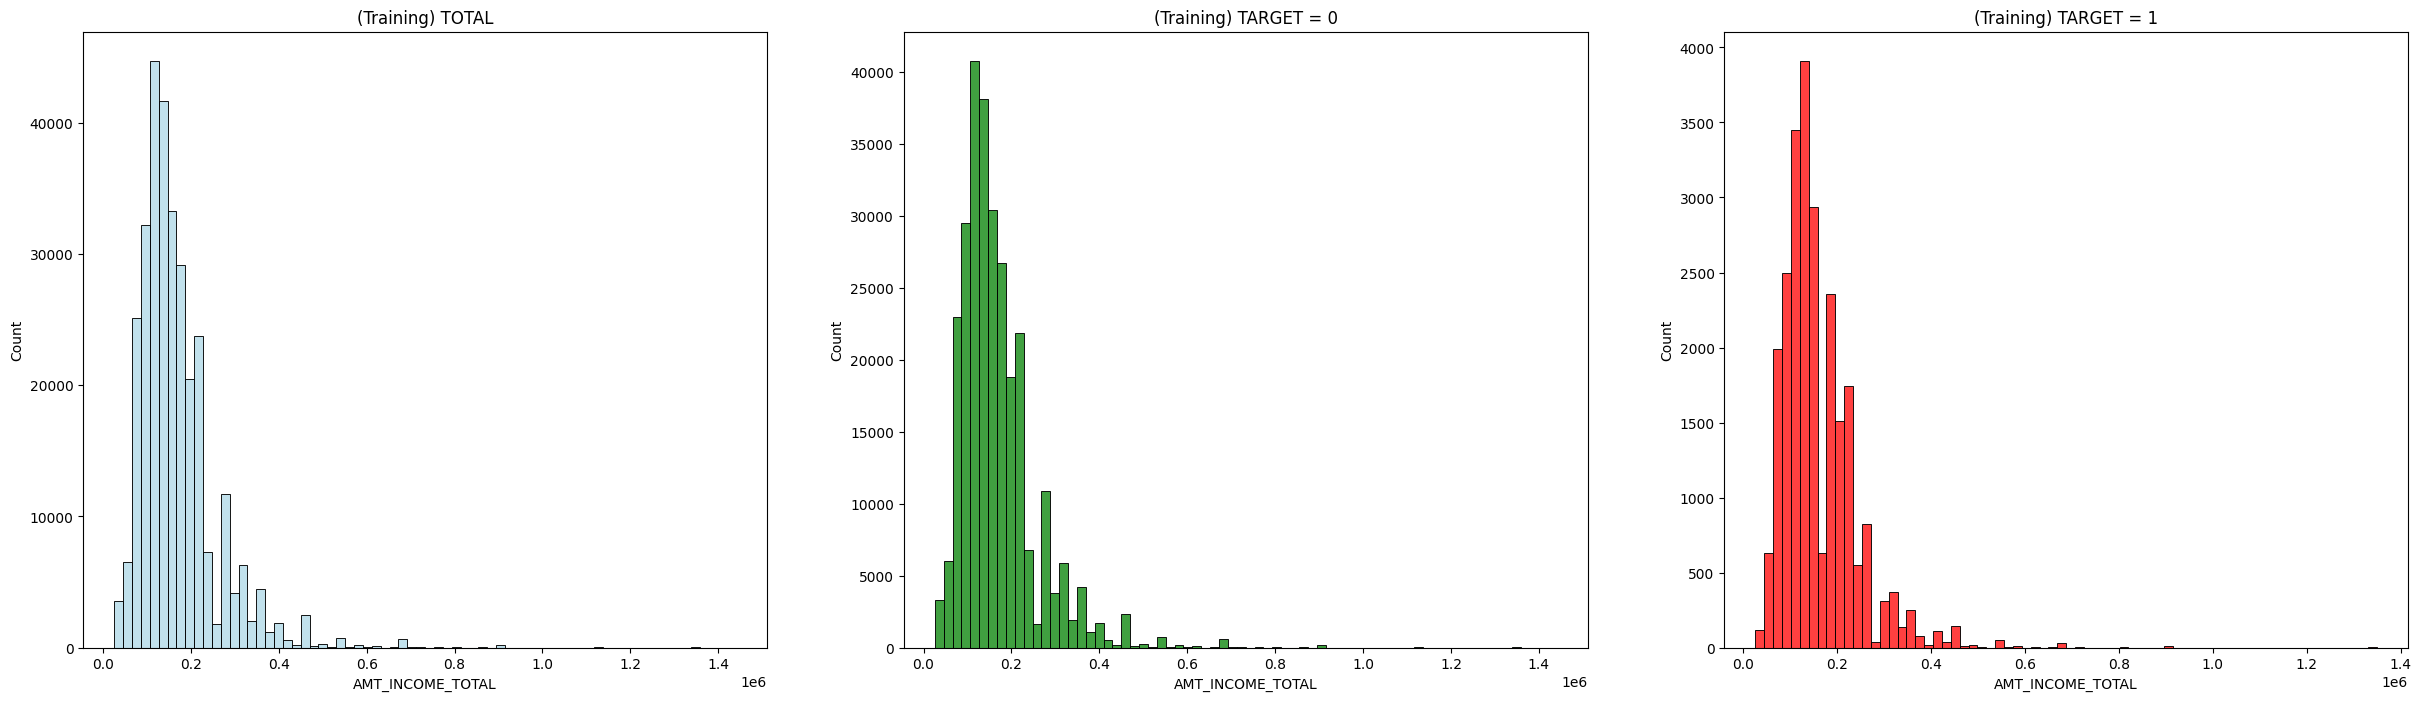

In [120]:
#Histograms of AMT_INCOME_TOTAL, AMT_CREDIT, REGION_POPULATION_RELATIVE, DAYS_EMPLOYED,  for both TARGET = 0 and = 1
i = 0
fig, ax = plt.subplots(1, 3, figsize=(30, 8))

total = training[training['AMT_INCOME_TOTAL'] < 1500000]
target_0 = training[(training['AMT_INCOME_TOTAL'] < 1500000) & (training['TARGET']==0)]
target_1 = training[(training['AMT_INCOME_TOTAL'] < 1500000) & (training['TARGET']==1)]

df_list = [total, target_0, target_1]

for ds in df_list:
    i += 1
    plt.subplot(1, 3, i)

    if i==1:
        color = 'lightblue'
        plt.title('(Training) TOTAL')
    elif i==2:
        color = 'green'
        plt.title('(Training) TARGET = 0')
    else:
        color = 'red'
        plt.title('(Training) TARGET = 1')

    sns.histplot(ds['AMT_INCOME_TOTAL'], bins=70, color=color)
    

print(len(training)-len(total))


4050000.0

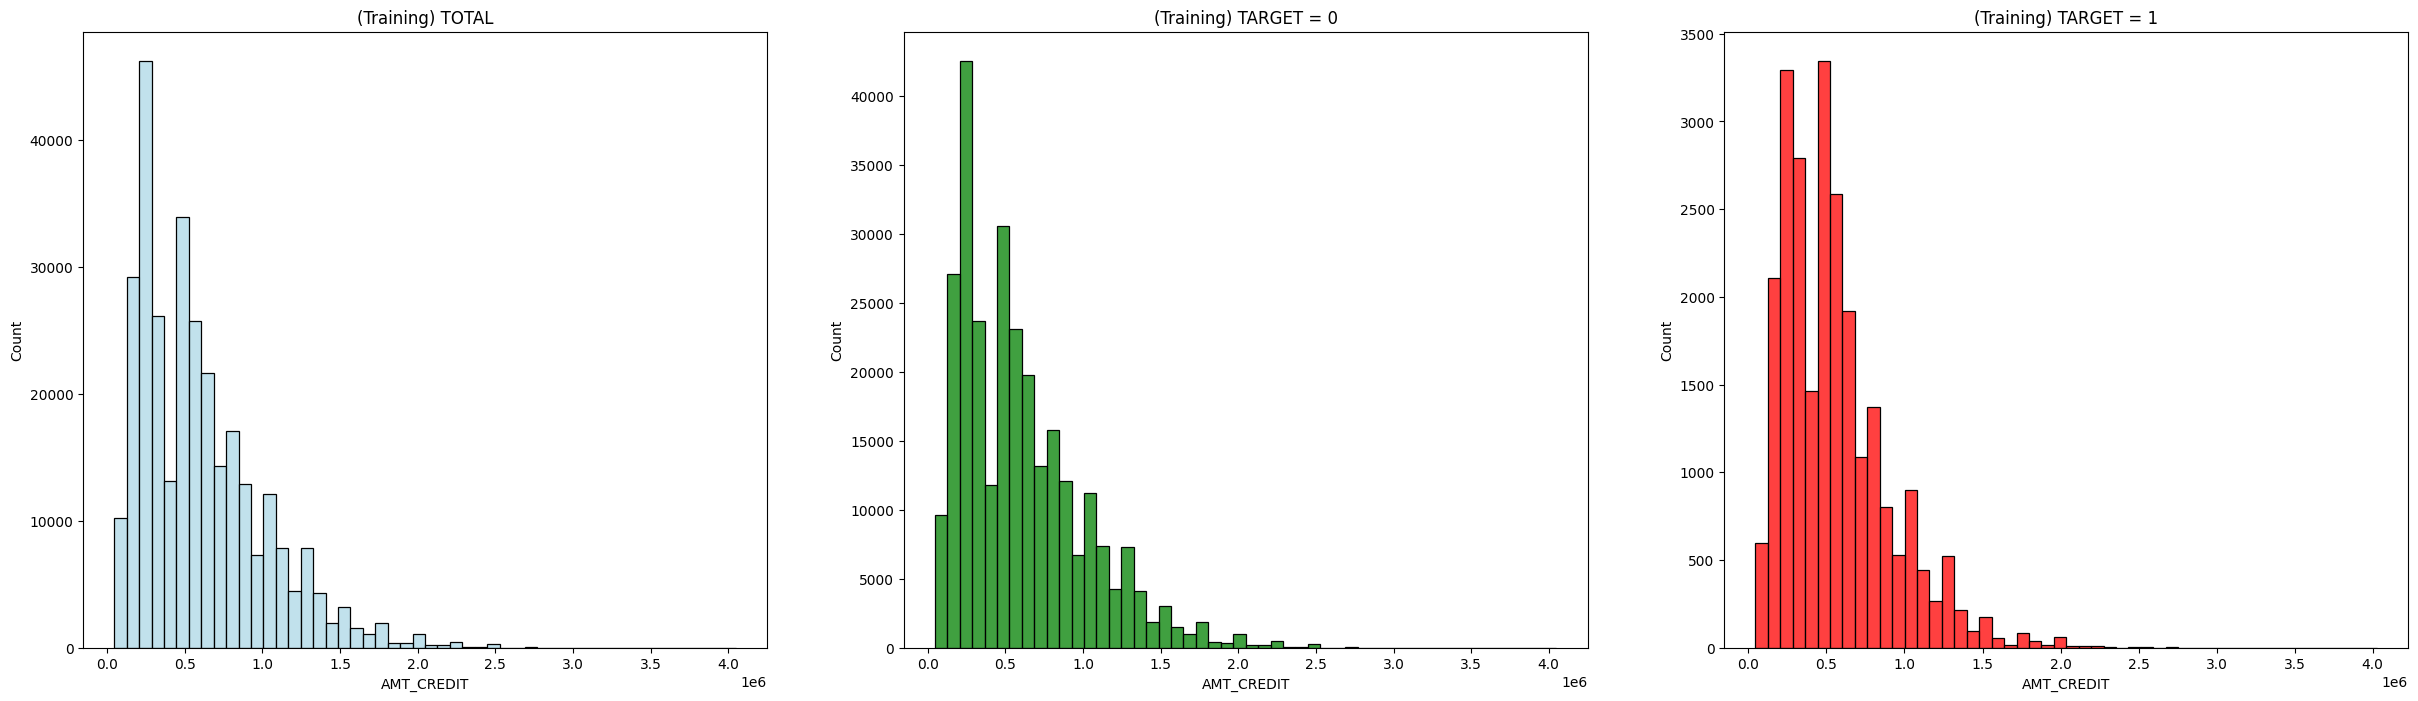

In [123]:
i = 0
fig, ax = plt.subplots(1, 3, figsize=(30, 8))

total = training
target_0 = training[training['TARGET']==0]
target_1 = training[training['TARGET']==1]

df_list = [total, target_0, target_1]

for ds in df_list:
    i += 1
    plt.subplot(1, 3, i)

    if i==1:
        color = 'lightblue'
        plt.title('(Training) TOTAL')
    elif i==2:
        color = 'green'
        plt.title('(Training) TARGET = 0')
    else:
        color = 'red'
        plt.title('(Training) TARGET = 1')

    sns.histplot(ds['AMT_CREDIT'], bins=50, color=color)

training['AMT_CREDIT'].max()

223701    0.072508
294650    0.072508
10496     0.072508
294671    0.072508
10500     0.072508
            ...   
78542     0.000533
195339    0.000533
257223    0.000533
280258    0.000290
248609    0.000290
Name: REGION_POPULATION_RELATIVE, Length: 307511, dtype: float64

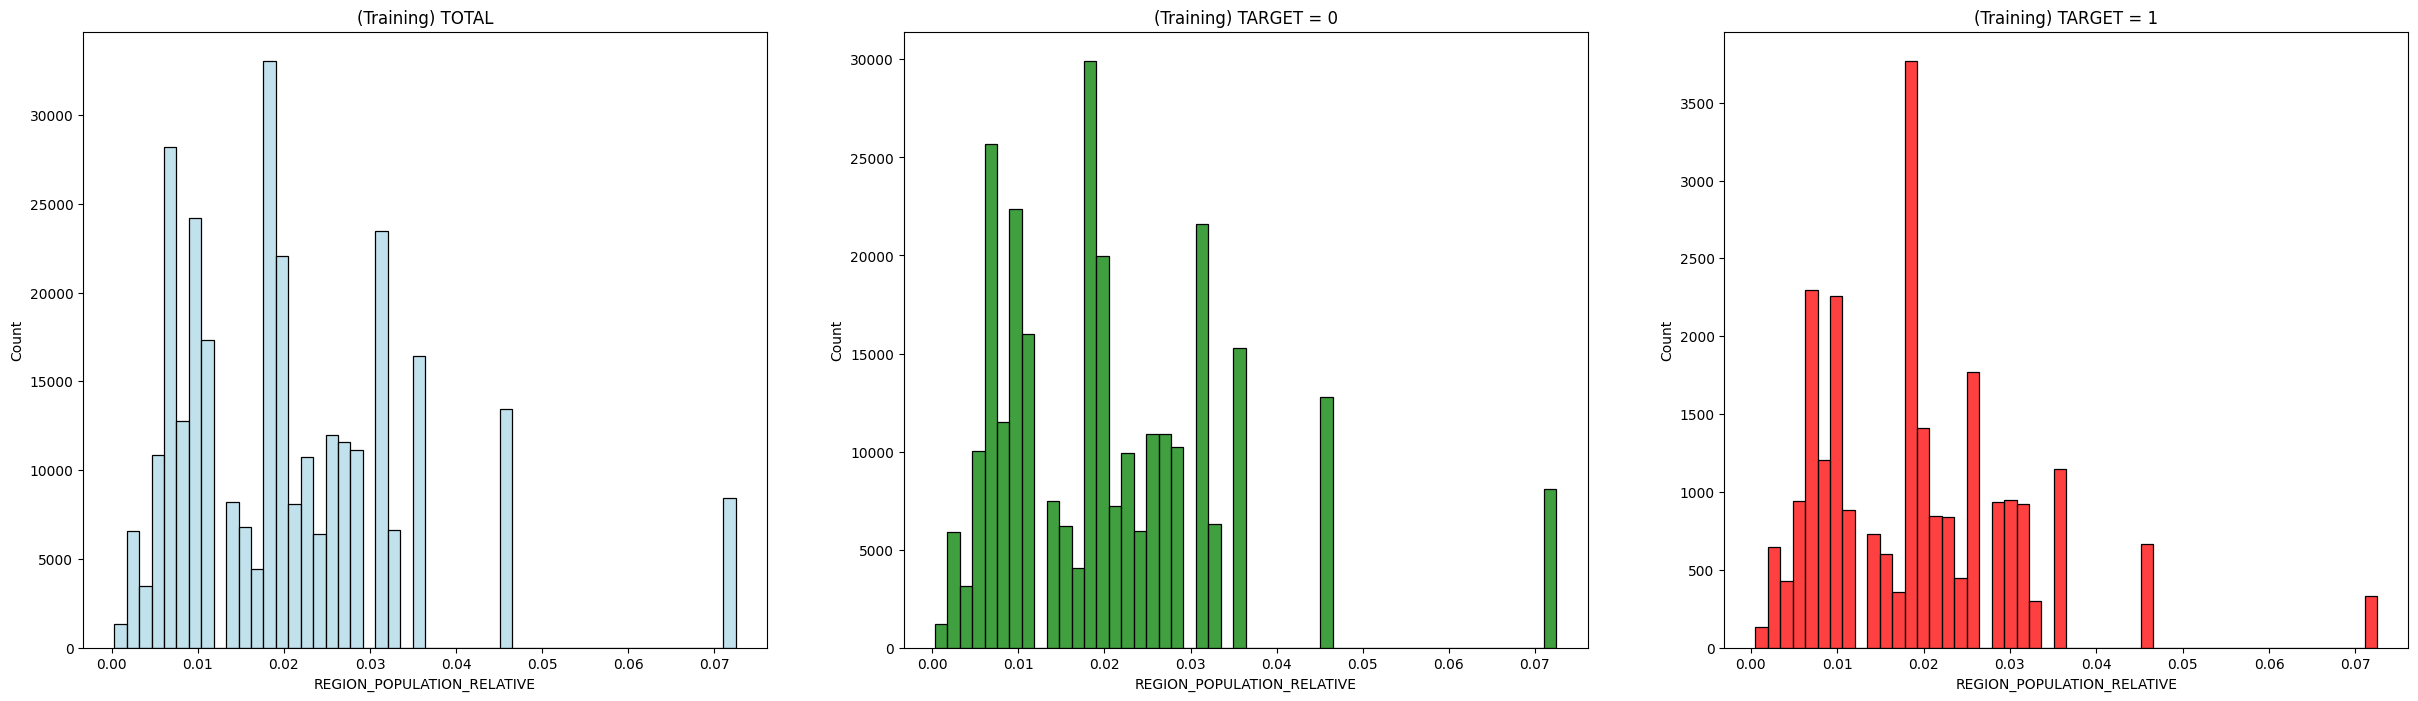

In [124]:
i = 0
fig, ax = plt.subplots(1, 3, figsize=(30, 8))

total = training
target_0 = training[training['TARGET']==0]
target_1 = training[training['TARGET']==1]

df_list = [total, target_0, target_1]

for ds in df_list:
    i += 1
    plt.subplot(1, 3, i)

    if i==1:
        color = 'lightblue'
        plt.title('(Training) TOTAL')
    elif i==2:
        color = 'green'
        plt.title('(Training) TARGET = 0')
    else:
        color = 'red'
        plt.title('(Training) TARGET = 1')

    sns.histplot(ds['REGION_POPULATION_RELATIVE'], bins=50, color=color)

training['REGION_POPULATION_RELATIVE'].sort_values(ascending=False)

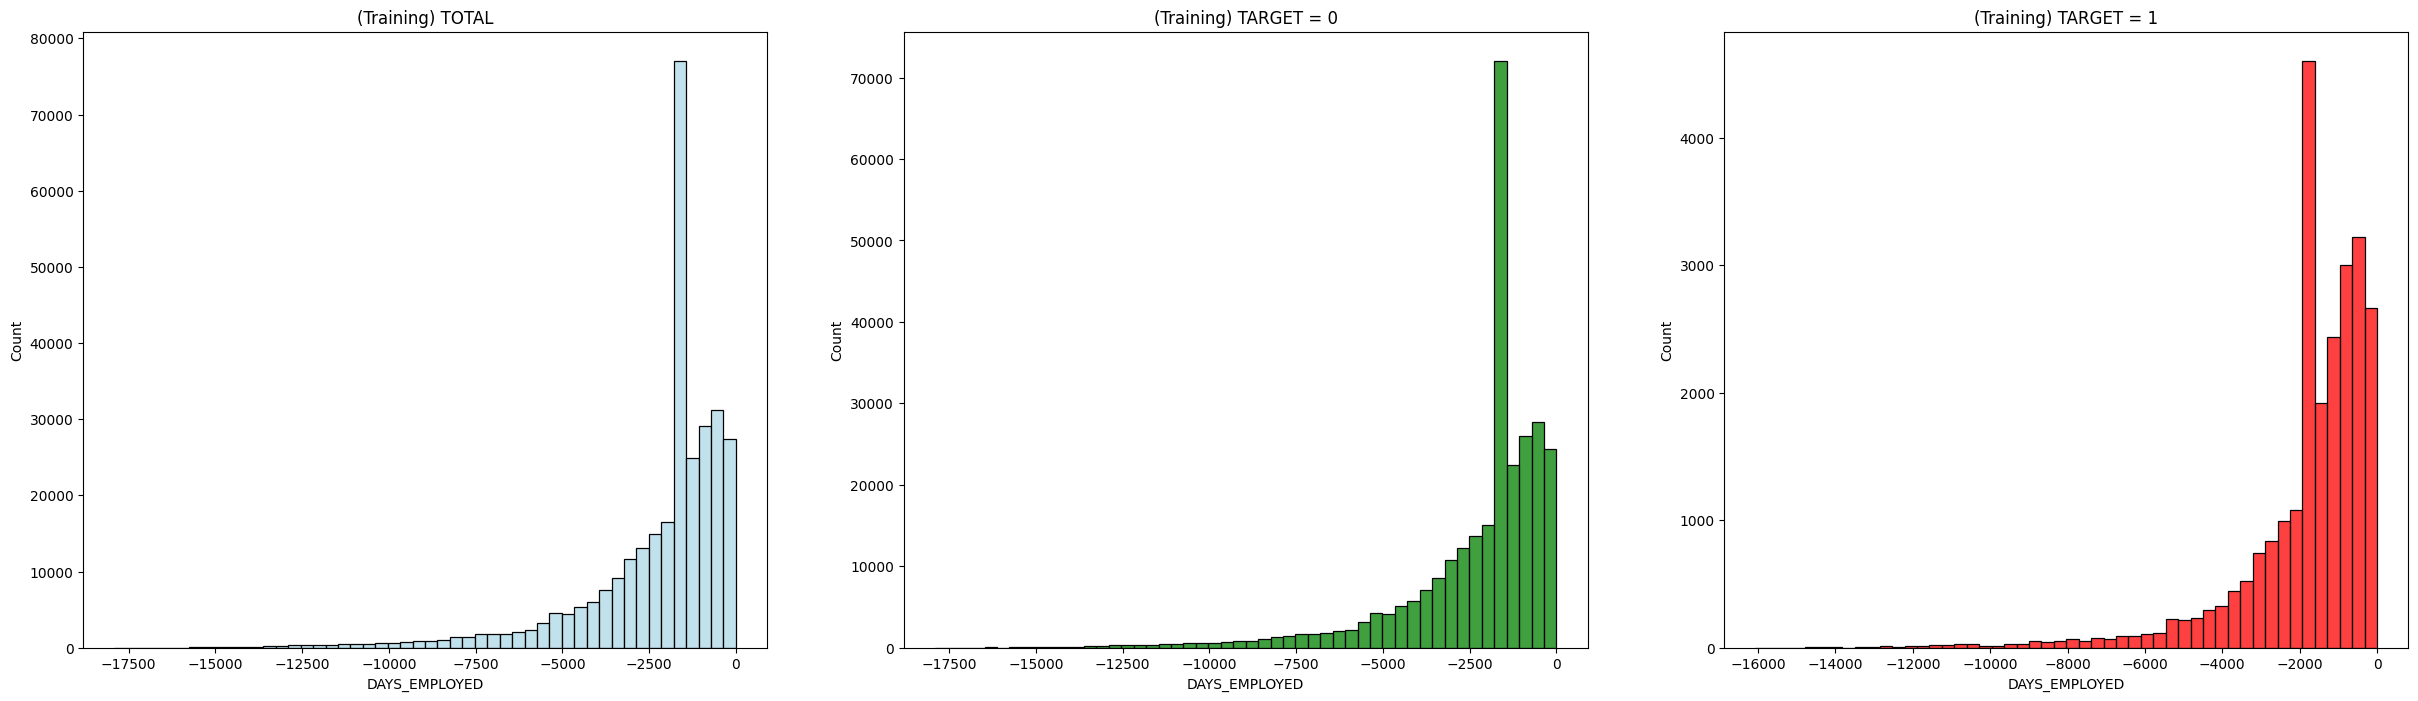

In [125]:
i = 0
fig, ax = plt.subplots(1, 3, figsize=(30, 8))

total = training
target_0 = training[training['TARGET']==0]
target_1 = training[training['TARGET']==1]

df_list = [total, target_0, target_1]

for ds in df_list:
    i += 1
    plt.subplot(1, 3, i)

    if i==1:
        color = 'lightblue'
        plt.title('(Training) TOTAL')
    elif i==2:
        color = 'green'
        plt.title('(Training) TARGET = 0')
    else:
        color = 'red'
        plt.title('(Training) TARGET = 1')

    sns.histplot(ds['DAYS_EMPLOYED'], bins=50, color=color)

# The reason we have the high bar is that we've imputed wrong data with the remaining data's median, previously.

In [126]:
display(HTML(scroll_stats_cat))

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
FLAG_MOBIL,307511,2,1,307510


In [ ]:
# with AMT_INCOME_TOTAL, I think it's better to categorize the column (e.g. Very low Income, Medium income, High, Very High Income ...)
# or, should we normalize it?